[Watch Full Video on Data Leakage](https://youtu.be/UELHcSU_Dpg)

`Data Leakage` (also called information leakage) happens when information that should be unavailable during model training accidentally influences the model. Our model “sees” or “learns from” data it shouldn’t have access to (like test data or future data). This causes `unrealistically high accuracy during training/testing`, but poor performance on unseen data.

# ⚠️ Common Causes

1. Doing preprocessing (scaling, encoding, imputing) before train-test split

2. Using target values to create features

3. Mixing future data with past data in time series problems

In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
x, y = make_regression(n_samples=500, n_features=3, noise=50, random_state=42)

# ❌ WRONG WAY (Data Leakage)

In [3]:
scaler = StandardScaler()
X_scaled_leak = scaler.fit_transform(x)        # Scaler sees all data (train + test)
X_train_leak, X_test_leak, y_train, y_test = train_test_split(X_scaled_leak, y, test_size=0.2, random_state=42)

In [4]:
model_leak = LinearRegression()
model_leak.fit(X_train_leak, y_train)
pred_leak = model_leak.predict(X_test_leak)

In [5]:
print("With Data Leakage (scaled before split):", r2_score(y_test, pred_leak))

With Data Leakage (scaled before split): 0.7945396288418394


The model really learns — but it’s learning from `cheated information`.

That’s why leaky models look smart in testing, but `collapse` in production.

Always isolate your training data, and fit transformations or create features only on training — never on the whole dataset.

# ✅ CORRECT WAY (No Leakage)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

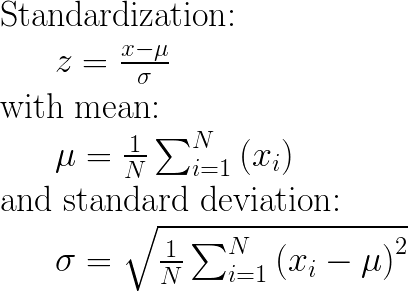

In [7]:
from IPython.display import Image
Image(filename='std.png')

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit only on training

In [9]:
X_test_scaled = scaler.transform(X_test)         # transform test separately

In [10]:
model_clean = LinearRegression()
model_clean.fit(X_train_scaled, y_train)
pred_clean = model_clean.predict(X_test_scaled)

In [11]:
print("Without Data Leakage:", r2_score(y_test, pred_clean))

Without Data Leakage: 0.7945396288418394
